In [19]:
from skimage import io, img_as_float
import matplotlib.pyplot as plt
import numpy as np
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import exposure

In [57]:
img = img_as_float(io.imread("python/Alloy_noisy.jpg"))

Text(0.5, 1.0, 'Alloy Histogram')

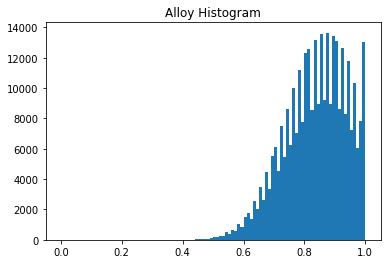

In [58]:
plt.hist(img.flat, bins=100, range=(0,1))
plt.title("Alloy Histogram")

In [59]:
sigma_est = np.mean(estimate_sigma(img, multichannel=True))

In [60]:
print("Estimate noise standard deviation = {}".format(sigma_est))

Estimate noise standard deviation = 0.08941398832805084


In [61]:
patch_kw = dict(patch_size=5,
               patch_distance=6,
               multichannel=True)

In [62]:
denoise = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, 
                           **patch_kw)

Text(0.5, 1.0, 'Denoise histogram')

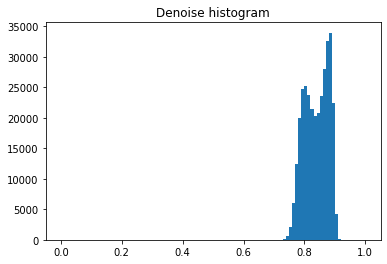

In [63]:
plt.hist(denoise.flat, bins=100, range=(0, 1))
plt.title("Denoise histogram")

In [64]:
eq_img = exposure.equalize_adapthist(denoise)

Text(0.5, 1.0, 'EQ histogram')

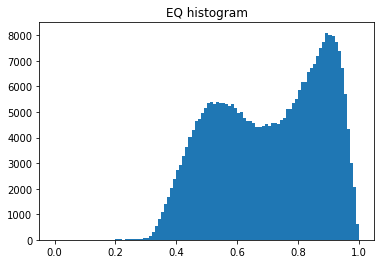

In [65]:
plt.hist(eq_img.flat, bins=100, range=(0, 1))
plt.title("EQ histogram")

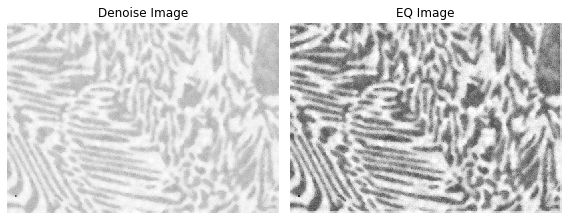

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8, 8))

ax = axes.ravel()

ax[0].imshow(denoise, cmap="gray")
ax[0].set_title("Denoise Image")

ax[1].imshow(eq_img, cmap="gray")
ax[1].set_title("EQ Image")

for x in ax:
    x.axis("off")
    
plt.tight_layout()
plt.show()

In [69]:
markers = np.zeros(img.shape, dtype=np.uint)

markers[(eq_img < 0.8) & (eq_img > 0.7)] = 1
markers[(eq_img > 0.85) & (eq_img < 0.99)] = 2

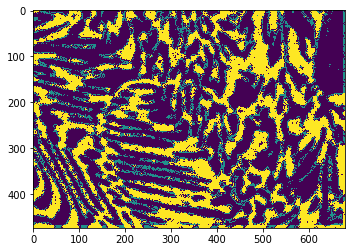

In [70]:
plt.imshow(markers)

In [71]:
from skimage.segmentation import random_walker

In [72]:
labels = random_walker(eq_img, markers, beta=10, mode="bf")

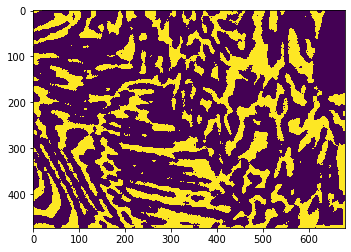

In [73]:
plt.imshow(labels)

In [74]:
seg1 = (labels==1)
seg2 = (labels==2)

In [75]:
all_seg = np.zeros((eq_img.shape[0], eq_img.shape[1], 3))

In [76]:
all_seg[seg1] = (1, 0, 0)
all_seg[seg2] = (0, 1, 0)

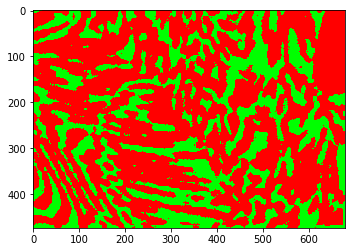

In [77]:
plt.imshow(all_seg)